### Predicción de Diabetes

##### Descripción General
##### El objetivo del proyecto es construir un modelo de aprendizaje automático supervisado en este caso utilizando un modelo de clasificación binaria (regresión logística), que prediga la probabilidad de que una persona sea diabética, basándose en ciertas características. Este proyecto incluirá la aplicación de técnicas de feature engineering para mejorar la calidad y relevancia de los datos iniciales, generando nuevas características que incrementen el rendimiento del modelo predictivo.

### 1.Importar librerías 

In [1049]:
# Importar librerías
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score



### 2.Importar archivo .CSV

In [1050]:
#Importación de los datos 
df = pd.read_csv('C:/Users/Dilson/Desktop/diabetes.csv')

### 3.Análisis Exploratorio de Datos (EDA)

In [1051]:
# Muestra primeras líneas del dataframe
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [1052]:
  #Descripción estadística  
df.describe()              

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [1053]:
df.info() # Obtener información concisa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


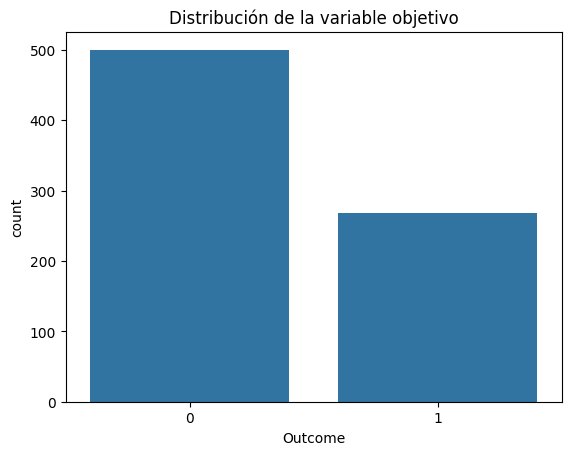

In [1054]:
#Distribución gráfica de variable objetivo
sns.countplot(x='Outcome', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()

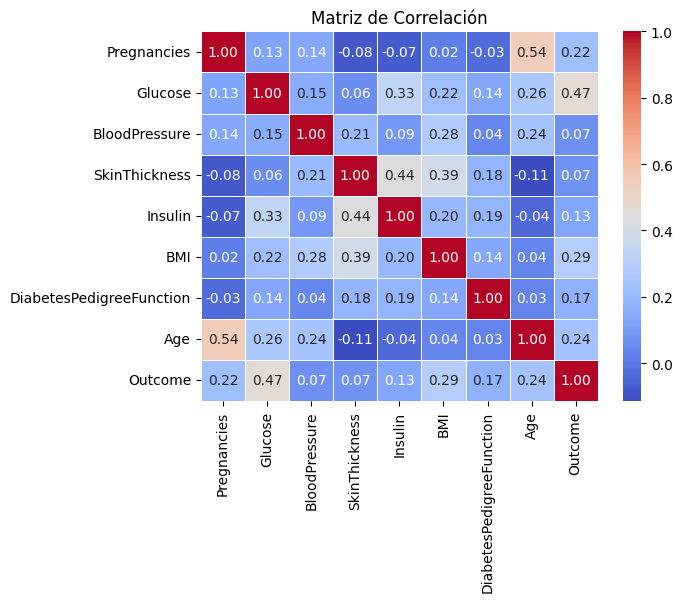

In [1055]:
#Correlación entre las variables
correlation_matrix = df.corr() # Se utiliza el método corr() para calcular el coeficiente de relación entre las columnas

# Configurar estilo de la figura
plt.Figure(figsize=(20,16))

#Crear mapa de calor con seaborn
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt= ".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

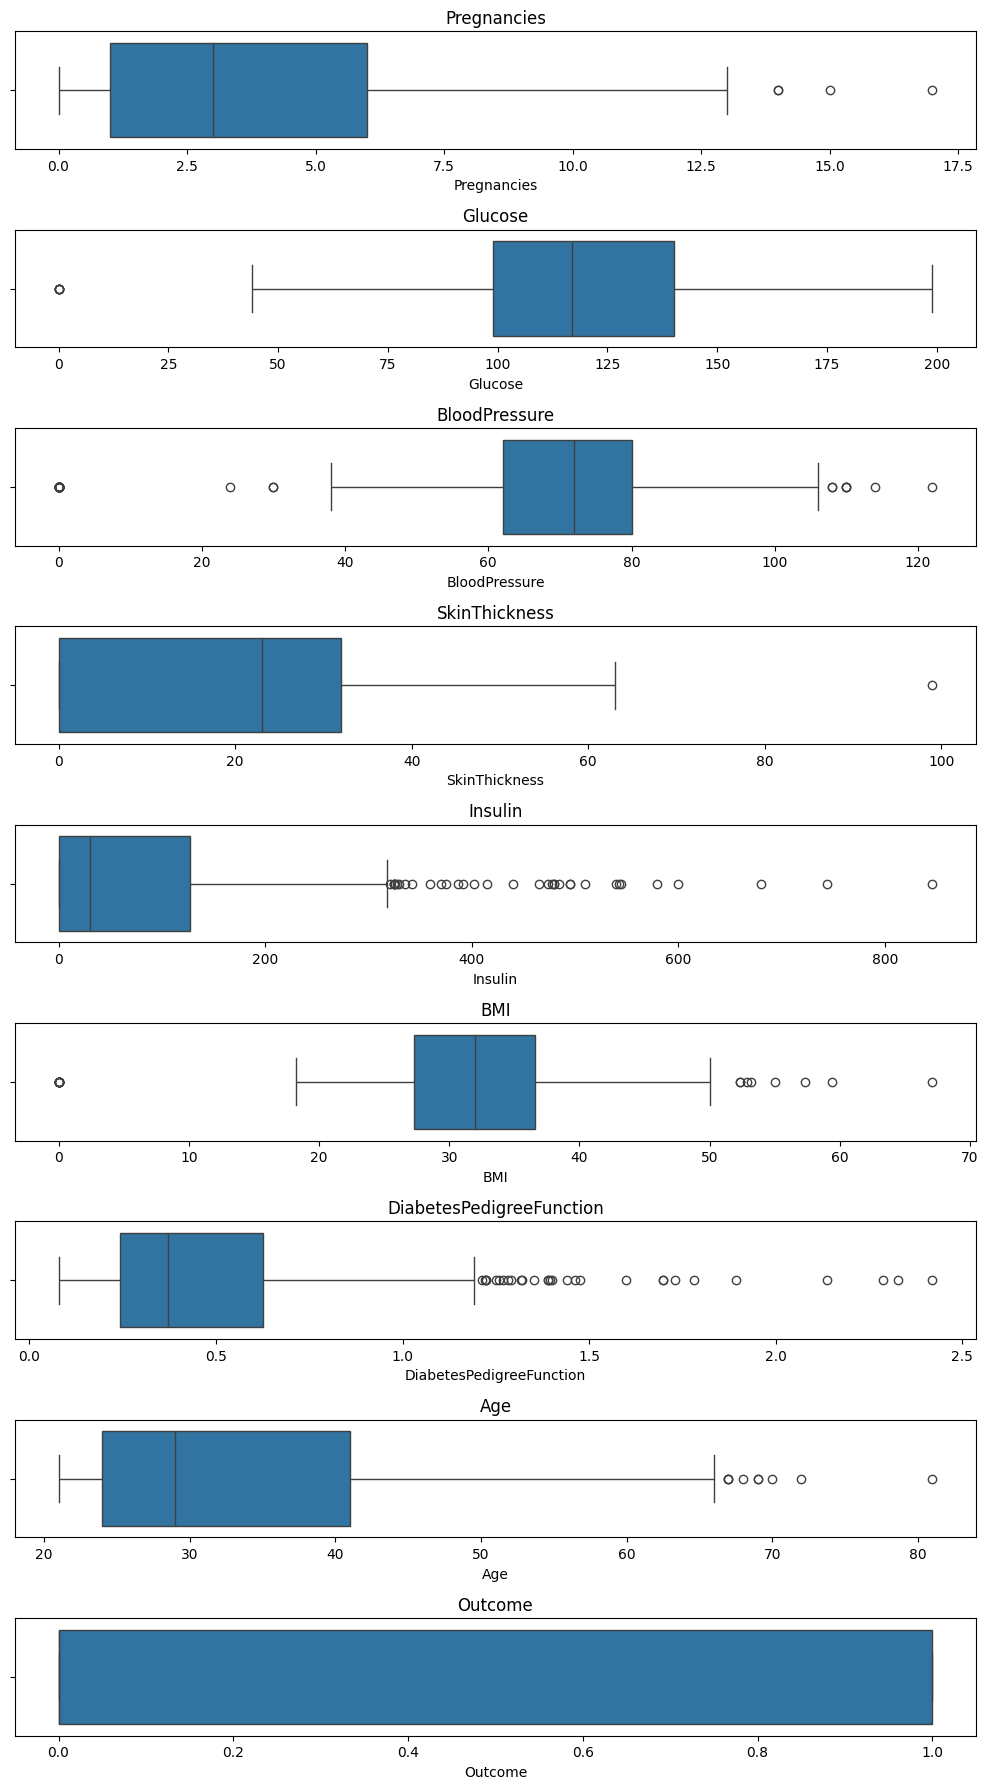

In [1056]:
#Boxplot para ver el comportamiento de las variables

# Incluir todas las columnas
all_cols = df.columns.tolist()

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(all_cols), figsize=(10, 2*len(all_cols))) #Crear una fila de subgráficos por cada columna

# Generar boxplots individuales
for i, col in enumerate(all_cols): # La función enumerate() se usa para iterar sobre all_cols
    sns.boxplot(x=df[col], ax=axes[i]) #Crea un boxplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### 4.Preprocesamiento de datos

In [1057]:
#Manejo de valores nullos
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [1058]:
#Identificar valores en 0
df[df == 0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

#### Reemplazar los valores en 0 de SkinThickness, Insulin, BMI, Glucose, BloodPressure.
En general, no es común que los valores en las columnas SkinThickness (espesor de la piel), Insulin (insulina), BMI (índice de masa corporal), Glucose (glucosa) y BloodPressure (presión arterial) sean 0, a menos que se trate de un error en la recopilación de datos o un valor faltante que fue codificado como 0. Los valores 0 en estas columnas pueden ser indicativos de datos incompletos o mal registrados.

Reemplazar estos valores por la mediana es una técnica válida para manejar los valores atípicos o faltantes, ya que la mediana representa un valor central que no se ve tan afectado por los extremos o valores inusuales. Además, la mediana es más robusta frente a los valores atípicos en comparación con la media, lo que la hace una opción más adecuada cuando se trata de datos que podrían estar sesgados o tener errores de entrada.

Al reemplazar los valores en 0 con la mediana, estamos imputando los valores faltantes de manera que conservamos la integridad de los datos sin distorsionar la distribución de las columnas. Esto mejora la calidad del análisis y permite obtener resultados más confiables en modelos posteriores, como la predicción de enfermedades o el análisis de factores de riesgo.

In [1059]:
# Reemplazar valores en 0 por la media 

df ['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())
df ['BloodPressure'] = df ['BloodPressure'].replace(0,df['BloodPressure'].median())
df ['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df ['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df ['BMI'] = df['BMI'].replace(0, df['BMI'].median())


In [1060]:
#Identificar valores en 0
df[df == 0].count()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### 4.Creación de Nuevas Características

Glucosa e Insulina: La insulina regula los niveles de glucosa en sangre. Cuando hay resistencia a la insulina (común en sobrepeso u obesidad), los niveles de glucosa aumentan.

Edad e IMC: A medida que envejecemos, la capacidad del cuerpo para regular la glucosa disminuye, y el sobrepeso o la obesidad (IMC alto) aumenta el riesgo de resistencia a la insulina.

In [1074]:
# Calcular la relacion Glucosa insulina
df ['Glucose_Insulin_Ratio'] = df ['Glucose']/ df ['Insulin']
# Calcular la BMI Y la Edad
df ['Age_BMI_Ratio'] = df ['Age']/ df ['BMI']


# Mostrando columnas creadas
pd.set_option ('display.max_columns', None)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Insulin_Ratio,Age_BMI_Ratio
0,6,148,72,35,30.500,33.600,0.627,50,1,4.852,1.488
1,1,85,66,29,30.500,26.600,0.351,31,0,2.787,1.165
2,8,183,64,23,30.500,23.300,0.672,32,1,6.000,1.373
3,1,89,66,23,94.000,28.100,0.167,21,0,0.947,0.747
4,0,137,40,35,168.000,43.100,2.288,33,1,0.815,0.766
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000,32.900,0.171,63,0,0.561,1.915
764,2,122,70,27,30.500,36.800,0.340,27,0,4.000,0.734
765,5,121,72,23,112.000,26.200,0.245,30,0,1.080,1.145
766,1,126,60,23,30.500,30.100,0.349,47,1,4.131,1.561


In [1075]:
# Explorar las columnas que se van a seleccionar 
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Glucose_Insulin_Ratio', 'Age_BMI_Ratio'],
      dtype='object')

In [1076]:
#Seleccionar columnas que van a ser variables predictoras
select_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Glucose_Insulin_Ratio', 'Age_BMI_Ratio']

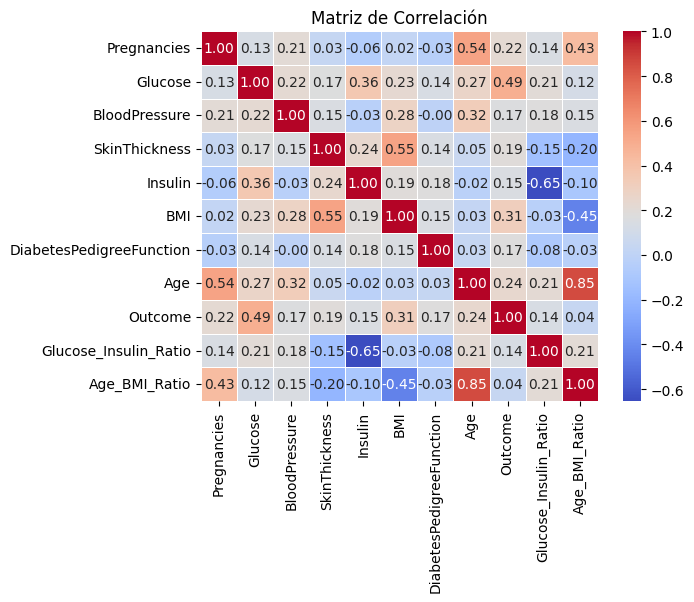

In [1077]:
#Correlación entre las variables
correlation_matrix = df.corr() # Se utiliza el método corr() para calcular el coeficiente de relación entre las columnas

# Configurar estilo de la figura
plt.Figure(figsize=(20,16))

#Crear mapa de calor con seaborn
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt= ".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

In [1078]:
# Definir variables predictoras (x) y variable objetivo (y)
x = df[select_features]
y = df ['Outcome']

In [1079]:
## Dividir los datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### 4. Escalar los datos

Escalar los datos es crucial para asegurarse de que las diferentes características tengan un impacto equilibrado y para mejorar la eficiencia de los algoritmos de machine learning. El escalado de datos en general es cualquier proceso que cambia la escala de los datos para que se ajusten a un rango o distribución específica.

In [1081]:
# Escalar las características
scaler = StandardScaler()

# Ajustar el escalador con los datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(x_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(x_test)

### 5.Entrenamiento del Modelo


In [1082]:
# Crear el modelo de regresión logística
log_reg_model = LogisticRegression(max_iter=2000, random_state=42)

# Entrenar el modelo
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [1086]:
# Hacer predicciones
y_pred = log_reg_model.predict(X_test_scaled)

In [1087]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7445887445887446
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Confusion Matrix:
 [[124  27]
 [ 32  48]]


El modelo de regresión logística muestra un buen rendimiento en general, con una precisión global del 74.46%. Sin embargo, tiene un desempeño desigual entre las clases 0 y 1. El modelo predice mejor la clase 0 (sin la condición), con una alta precisión y recall, pero tiene dificultades al predecir la clase 1 (con la condición), especialmente en cuanto a precisión y recall. 

En resumen, aunque el modelo tiene una precisión decente, se recomienda explorar formas de mejorar el manejo de la clase 1, ya que la tasa de falsos negativos es un área que podría comprometer la efectividad del modelo, especialmente en aplicaciones críticas como la detección de enfermedades o condiciones.

### Validación cruzada

Este código realiza una validación cruzada de 3 pliegues (folds) para evaluar el rendimiento del modelo de regresión logística

In [1090]:


# Realizar validación cruzada de 3 pliegues (folds)
cv_scores = cross_val_score(log_reg_model, x_train, y_train, cv=3, scoring='accuracy')

# Mostrar los resultados
print("Puntajes de validación cruzada (accuracy):", cv_scores)
print("Promedio de la validación cruzada:", np.mean(cv_scores))

Puntajes de validación cruzada (accuracy): [0.79329609 0.74860335 0.77094972]
Promedio de la validación cruzada: 0.7709497206703911


#### Conclusión:
Buen desempeño: El modelo muestra una precisión razonablemente alta (77.09% de promedio), lo que indica que está realizando predicciones con un buen nivel de acierto.


Consistencia: Los puntajes de los tres pliegues son bastante cercanos entre sí, lo que sugiere que el modelo no está sobreajustado (overfitting) ni subajustado (underfitting), sino que tiene un rendimiento estable.